In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# antes de empezar importamos las librerías que vamos a usar. 
# Importar librerías para web scraping y manipulación de datos
# -----------------------------------------------------------------------
from bs4 import BeautifulSoup
import requests

# Importar librerías para manipulación y análisis de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importar librerías para procesamiento de texto
# -----------------------------------------------------------------------
import re

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

0-Realizará una solicitud HTTP GET a la siguiente url.

1.-Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

2-Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

3-Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:

"coche": Nombres de los coches.

"precio_rebajado": Precios rebajados.

"precio_original": Precios originales.

"km": Kilómetros recorridos.

4-Retornará el DataFrame resultante.

In [5]:
def scrape_coches_ocasion(url):
    resp = requests.get(url)
    print(f"La respuesta a la petición es:{resp.status_code}")

In [6]:
url = "https://www.ocasionplus.com/coches-segunda-mano?v2&orderBy=morePopular"

In [7]:
scrape_coches_ocasion(url)

La respuesta a la petición es:200


In [9]:
resp = requests.get(url)

In [10]:
sopa_coches = BeautifulSoup(resp.content, 'html.parser')

<!DOCTYPE html>
<html lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link as="image" fetchpriority="high" href="https://images.grupoocasionplus.com/1JKwtZDyKnBSZaxoNSIYqwZlroCaquRQ8-vkSpnSH9s/mobilex2a/aHR0cHM6Ly9mb3Rvcy5lc3RhdGljb3NtZi5jb20vZm90b3NfYW51bmNpb3MvMDAvMDMvOTcvMjkvNjQvOS94MDEuanBnPzE0Nzc3NjczOTIyPSZtZDU9NjdkYzZhMWU5NDU3M2RhOGVjZDY2NWYwNzU4NjRkZWY" rel="preload"/>
  <link data-precedence="next" href="/hera/_next/static/css/947b97ffbe7f670e.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/4621d5856ff84749.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/8517fc2698044916.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/1e0ae1308e6b8f46.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/_next/static/css/d1a51260c3e4ab42.css" rel="stylesheet"/>
  <link data-precedence="next" href="/hera/
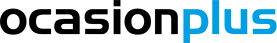

In [11]:
print(sopa_coches.prettify())

In [40]:
## nombre de los coches:

nombre_coches = sopa_coches.findAll("span", {"data-test": "span-brand-model"})

lista_nombre =[]

for n in nombre_coches:
    lista_nombre.append(n.text)

In [41]:
lista_nombre

['Suzuki Swift',
 'Nissan X-TRAIL',
 'Citroën Berlingo',
 'Renault Trafic',
 'Renault Kangoo Furgón',
 'Mitsubishi ASX',
 'Jaguar F-Pace',
 'Toyota Aygo',
 'Mini MINI',
 'Audi Q3 Sportback',
 'Volkswagen T-Roc',
 'Volkswagen Taigo',
 'Volkswagen T-Cross',
 'Volkswagen T-Cross',
 'Seat León',
 'Seat León',
 'Ford Fiesta',
 'Ford Fiesta',
 'Ford Kuga',
 'Ford Kuga']

In [43]:
## precios con descuento
precios_desc_coches = sopa_coches.findAll("span", {"data-test": "span-finance"})

lista_precios_des =[]

for n in precios_desc_coches:
    lista_precios_des.append(n.text)

In [44]:
lista_precios_des

['4.900€',
 '16.819€',
 '16.546€',
 '19.910€',
 '8.728€',
 '15.364€',
 '24.764€',
 '12.900€',
 '9.800€',
 '34.082€',
 '25.905€',
 '16.691€',
 '17.237€',
 '17.182€',
 '12.364€',
 '13.137€',
 '14.410€',
 '14.991€',
 '22.487€',
 '23.364€']

In [47]:
## precios totales
precios_coches = sopa_coches.findAll("span", {"data-test": "span-price"})

lista_precios=[]

for n in precios_coches:
    lista_precios.append(n.text)

In [48]:
lista_precios

['19.800€',
 '18.200€',
 '21.900€',
 '9.900€',
 '17.400€',
 '30.990€',
 '10.990€',
 '39.900€',
 '29.900€',
 '19.550€',
 '19.790€',
 '19.900€',
 '14.950€',
 '16.900€',
 '18.900€',
 '18.200€',
 '28.900€',
 '29.350€']

In [49]:
## km
km_coches = sopa_coches.findAll("span", {"data-test": "span-km"})

lista_km=[]

for n in km_coches:
    lista_km.append(n.text)

In [50]:
lista_km

['100.910 Km',
 '127.683 Km',
 '100.366 Km',
 '65.942 Km',
 '128.343 Km',
 '21.610 Km',
 '139.456 Km',
 '30.479 Km',
 '135.506 Km',
 '46.374 Km',
 '39.247 Km',
 '33.305 Km',
 '38.071 Km',
 '30.920 Km',
 '99.794 Km',
 '86.051 Km',
 '37.084 Km',
 '29.003 Km',
 '52.196 Km',
 '34.078 Km']

In [ ]:
datos_coches =[]

coche={}

In [52]:
lista_total = list(zip(lista_nombre,lista_precios_des,lista_precios,lista_km))
print(lista_total)

[('Suzuki Swift', '4.900€', '19.800€', '100.910 Km'), ('Nissan X-TRAIL', '16.819€', '18.200€', '127.683 Km'), ('Citroën Berlingo', '16.546€', '21.900€', '100.366 Km'), ('Renault Trafic', '19.910€', '9.900€', '65.942 Km'), ('Renault Kangoo Furgón', '8.728€', '17.400€', '128.343 Km'), ('Mitsubishi ASX', '15.364€', '30.990€', '21.610 Km'), ('Jaguar F-Pace', '24.764€', '10.990€', '139.456 Km'), ('Toyota Aygo', '12.900€', '39.900€', '30.479 Km'), ('Mini MINI', '9.800€', '29.900€', '135.506 Km'), ('Audi Q3 Sportback', '34.082€', '19.550€', '46.374 Km'), ('Volkswagen T-Roc', '25.905€', '19.790€', '39.247 Km'), ('Volkswagen Taigo', '16.691€', '19.900€', '33.305 Km'), ('Volkswagen T-Cross', '17.237€', '14.950€', '38.071 Km'), ('Volkswagen T-Cross', '17.182€', '16.900€', '30.920 Km'), ('Seat León', '12.364€', '18.900€', '99.794 Km'), ('Seat León', '13.137€', '18.200€', '86.051 Km'), ('Ford Fiesta', '14.410€', '28.900€', '37.084 Km'), ('Ford Fiesta', '14.991€', '29.350€', '29.003 Km')]


In [53]:
k_list = ["Coche", "Precio_Total", "Precio_Reducido", "KM"] # Lista de claves v1_list = [10, 15, 20, 25] # Primera lista de valores v2_list = [20, 25, 30, 35] # Segunda lista de valores v3_list = [30, 35, 40, 45] # Tercera lista de valores # Construir la lista de diccionarios usando zip() data = [{"k": k, "v1": v1, "v2": v2, "v3": v3} for k, v1, v2, v3 in zip(k_list, v1_list, v2_list, v3_list)] # Convertir en DataFrame df = pd.DataFrame(data)

In [54]:
k_list

['Coche', 'Precio_Total', 'Precio_Reducido', 'KM']

In [58]:
data = [{"coche":k,"Precio_Total":v1, "Precio_Reducido":v2,"KM":v3}
    for k,v1,v2,v3 in zip(lista_nombre,lista_precios,lista_precios_des,lista_km)]


In [59]:
data

[{'coche': 'Suzuki Swift',
  'Precio_Total': '19.800€',
  'Precio_Reducido': '4.900€',
  'KM': '100.910 Km'},
 {'coche': 'Nissan X-TRAIL',
  'Precio_Total': '18.200€',
  'Precio_Reducido': '16.819€',
  'KM': '127.683 Km'},
 {'coche': 'Citroën Berlingo',
  'Precio_Total': '21.900€',
  'Precio_Reducido': '16.546€',
  'KM': '100.366 Km'},
 {'coche': 'Renault Trafic',
  'Precio_Total': '9.900€',
  'Precio_Reducido': '19.910€',
  'KM': '65.942 Km'},
 {'coche': 'Renault Kangoo Furgón',
  'Precio_Total': '17.400€',
  'Precio_Reducido': '8.728€',
  'KM': '128.343 Km'},
 {'coche': 'Mitsubishi ASX',
  'Precio_Total': '30.990€',
  'Precio_Reducido': '15.364€',
  'KM': '21.610 Km'},
 {'coche': 'Jaguar F-Pace',
  'Precio_Total': '10.990€',
  'Precio_Reducido': '24.764€',
  'KM': '139.456 Km'},
 {'coche': 'Toyota Aygo',
  'Precio_Total': '39.900€',
  'Precio_Reducido': '12.900€',
  'KM': '30.479 Km'},
 {'coche': 'Mini MINI',
  'Precio_Total': '29.900€',
  'Precio_Reducido': '9.800€',
  'KM': '135.50

In [60]:
df = pd.DataFrame(data)

In [61]:
df

,coche,Precio_Total,Precio_Reducido,KM
0,Suzuki Swift,19.800€,4.900€,100.910 Km
1,Nissan X-TRAIL,18.200€,16.819€,127.683 Km
2,Citroën Berlingo,21.900€,16.546€,100.366 Km
3,Renault Trafic,9.900€,19.910€,65.942 Km
4,Renault Kangoo Furgón,17.400€,8.728€,128.343 Km
5,Mitsubishi ASX,30.990€,15.364€,21.610 Km
6,Jaguar F-Pace,10.990€,24.764€,139.456 Km
7,Toyota Aygo,39.900€,12.900€,30.479 Km
8,Mini MINI,29.900€,9.800€,135.506 Km
9,Audi Q3 Sportback,19.550€,34.082€,46.374 Km
